In [1]:
import numpy as np
import pandas as pd
import glob
import os
from resampled import *

## Paper data

In [2]:
input = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/sample for plot from baseline paper/s100_processed_running_sample/lfoot/acc.npy", allow_pickle=True).astype(float)
print(input.shape)
print(input)
label = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/sample for plot from baseline paper/s100_processed_running_sample/lankle/angle.npy")
print(label.shape)
print(label)

(3600, 3)
[[  8.05741223 -23.64478881   8.13948426]
 [  9.12137073 -23.28251317   8.47151131]
 [ 10.2944156  -22.99317172   8.87490611]
 ...
 [ 21.63248482  10.01728682 -16.31198964]
 [ 22.32028038   9.24192971 -17.14280009]
 [ 22.62715327   8.1344764  -17.85270198]]
(3600, 3)
[[-22.12800601  -2.85138374 -20.39085636]
 [-21.11102855  -3.4009623  -20.74290986]
 [-19.99236401  -3.93604964 -21.1334905 ]
 ...
 [  8.86983164 -12.28768019 -25.92323826]
 [  8.31759496 -11.89573277 -25.62413791]
 [  7.7115105  -11.48256352 -25.28248392]]


## External data preprocessing (Dataset 3)

In [3]:
imu_merge_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Data/IMUExerciseClassification/parsed_h5_csv/"
angle_merge_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Data/IMUExerciseClassification/parsed_joint_angles"

### Merge dataset

In [ ]:
#def merge_csv_files(folder_path):
#    # Get all subdirectories (SUB folders)
#    sub_dirs = sorted(glob.glob(f"{folder_path}/*/"))
#    
#    for sub_dir in sub_dirs:
#        for category in ["Walk", "Run"]:
#            category_path = os.path.join(sub_dir, category)
#            file_paths = sorted(glob.glob(f"{category_path}/*.csv"))
#            
#            if not file_paths:
#                print(f"No file in: {category_path}")
#                continue
#            
#            '''Merge all files'''
#            # Read the first file and manually retain the first row (body part) and header
#            main_df = pd.read_csv(file_paths[0], header=None, keep_default_na=False)
#            # Read the remaining files (without headers, ensuring column alignment)
#            dfs = [pd.read_csv(file, header=None, names=main_df.columns, skiprows=3, keep_default_na=False) for file in file_paths[1:]]
#            # Merge all DataFrames
#            merged_df = pd.concat([main_df] + dfs, ignore_index=True)
#            
#            '''Save merged data'''
#            # Define output file path
#            output_file = os.path.join(category_path, f"Merged_{category}.csv")
#            
#            # Save the merged DataFrame as a new CSV file
#            merged_df.to_csv(output_file, index=False, header=True)
#            print(f"Merge completed, saved as: {output_file}")
#            
#merge_csv_files(angle_merge_path)

### Generate resampled dataset (input)

In [14]:
def generate_resample_csv_files(folder_path):
    # Get all subdirectories (SUB folders)
    sub_dirs = sorted(glob.glob(f"{folder_path}/*/"))
    
    for sub_dir in sub_dirs:
        for category in ["Walk", "Run"]:
            category_path = os.path.join(sub_dir, category)
            file_paths = sorted(glob.glob(f"{category_path}/Merged*.csv"))
            if not file_paths:
                print(f"No file in: {category_path}")
                continue
            #print("File path:", file_paths[0])
            #print("Type:", type(file_paths[0]))

            
            '''Merge all files'''
            # Load and resample
            #df_raw = load_imu_data(file_paths[0])
            #df_resampled = resample_full_data_with_time_gaps(df_raw)
            
            df_raw = load_angle_data(file_paths[0])
            df_resampled = resample_full_data_from_index_reset(df_raw)
            
            df_resampled.to_csv(os.path.join(category_path, f"resmapled_{category}.csv"), index=False)

            # Choose a column to visualize (adjust index as needed)
            #target_column = 'LeftFoot_Accelerometer_X'
            #plot_sensor_waveform(df_resampled, target_column)
            
generate_resample_csv_files(imu_merge_path)

#### resample imu input

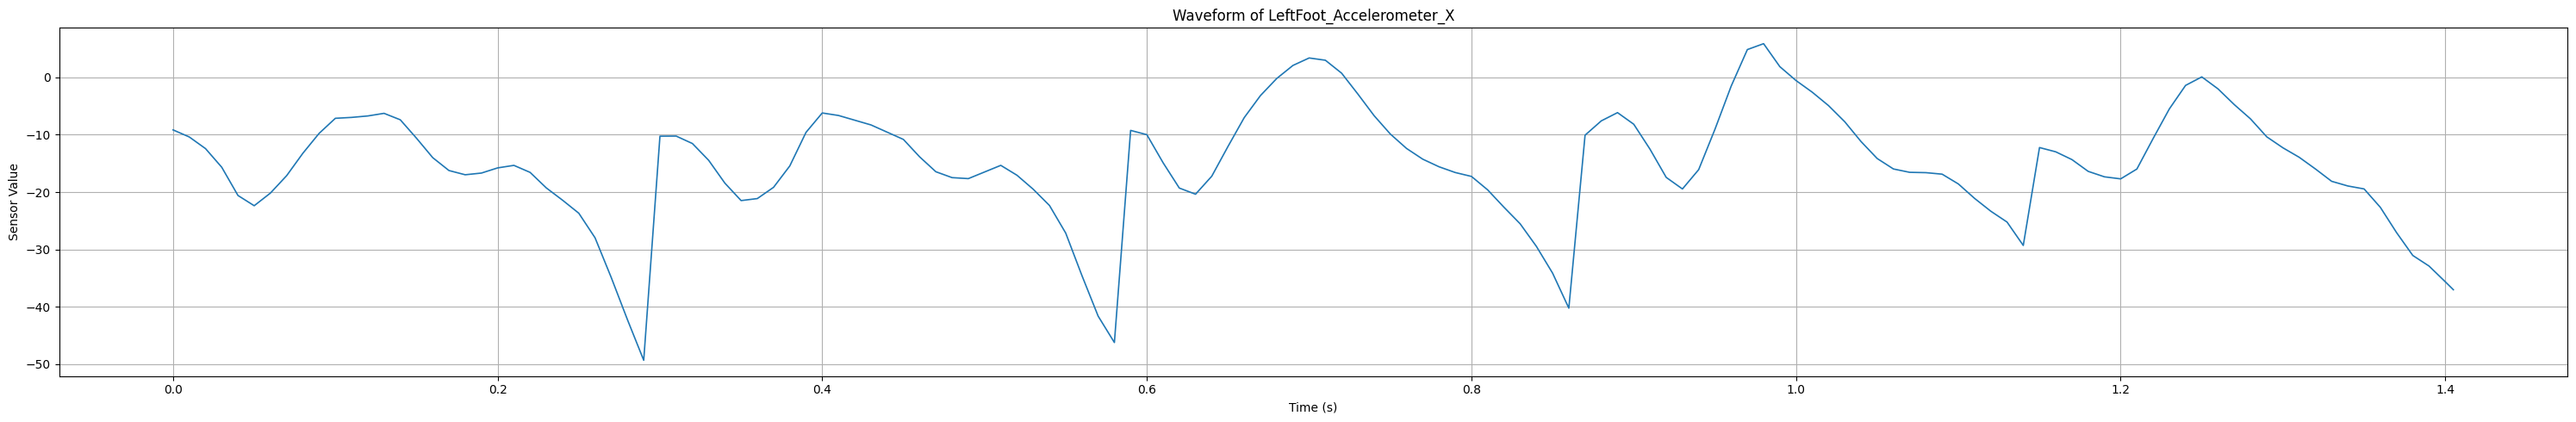

In [4]:
df_resample = pd.read_csv("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Data/IMUExerciseClassification/parsed_h5_csv/SUB01/Run/resmapled_Run.csv")
target_column = 'LeftFoot_Accelerometer_X'
plot_sensor_waveform(df_resample, target_column)

#### resample angle label

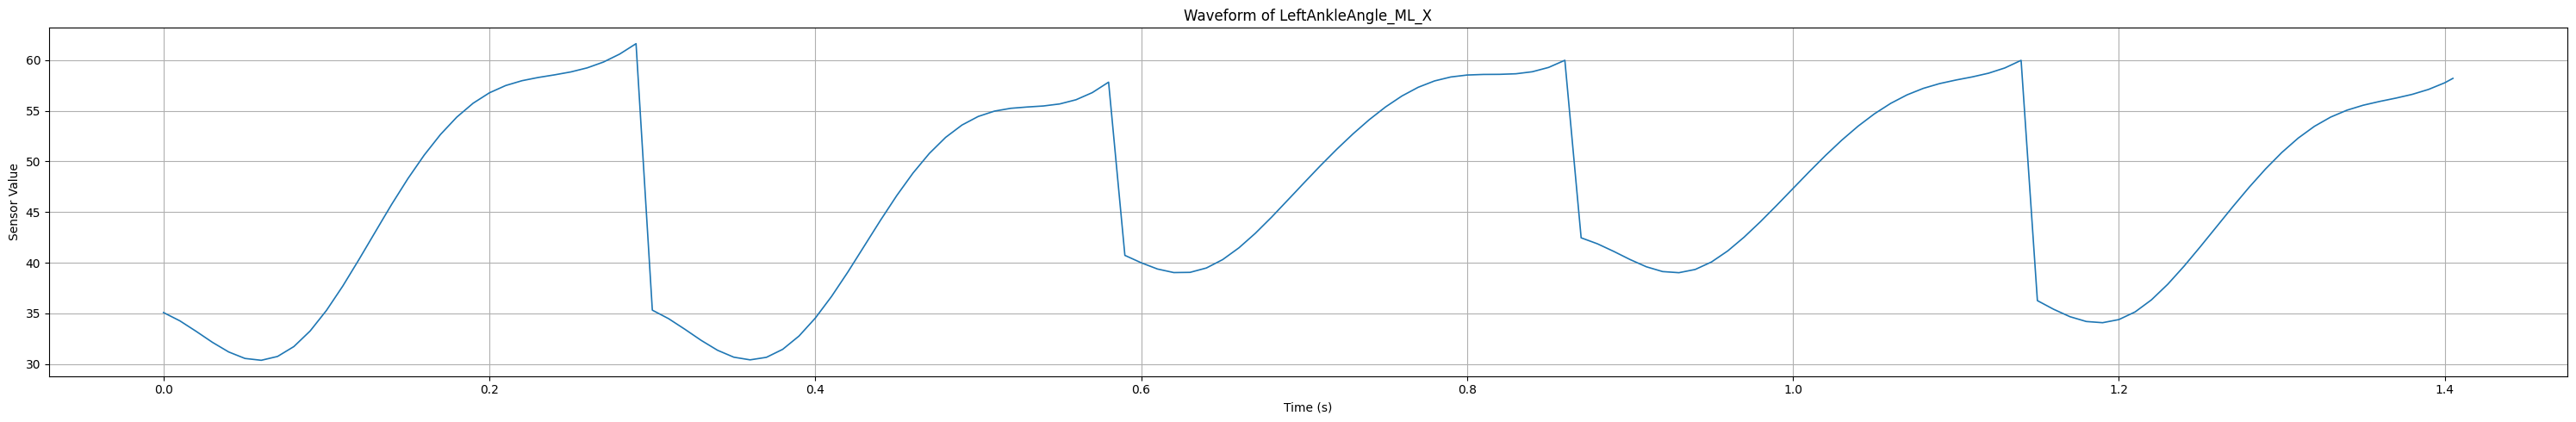

In [5]:
df_resample = pd.read_csv("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Data/IMUExerciseClassification/parsed_joint_angles/SUB01/Run/resampled_Run.csv")
target_column = 'LeftAnkleAngle_ML_X'
plot_sensor_waveform(df_resample, target_column)

### imu trend comparison

282


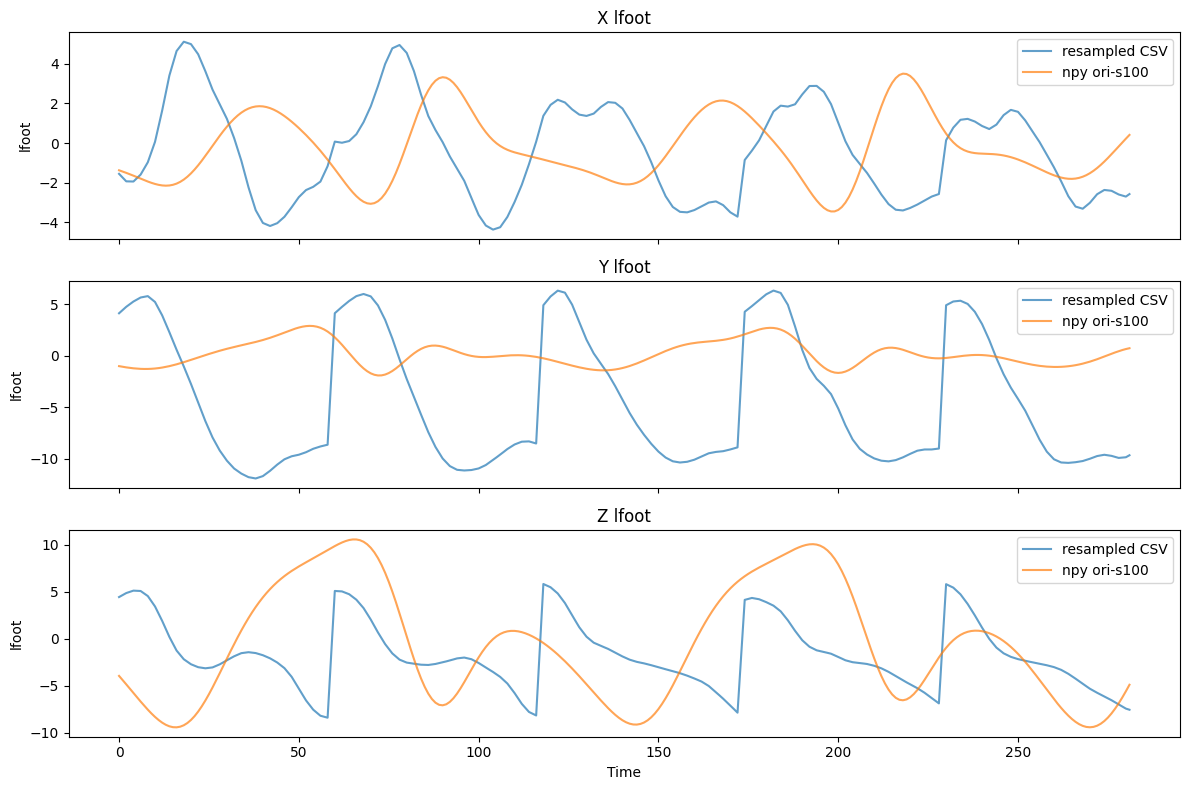

In [8]:
## === Load and Prepare Data ===
file_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Data/IMUExerciseClassification/parsed_h5_csv/SUB01/Run/resmapled_Run.csv"
df_resampled = pd.read_csv(file_path)
#
# Extract LeftFoot Accelerometer Data (X, Y, Z)
#csv_lfoot_acc = df_resampled[['LeftFoot_Accelerometer_X', 'LeftFoot_Accelerometer_Y', 'LeftFoot_Accelerometer_Z']]
#time_csv = np.arange(len(csv_lfoot_acc))
external = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Running/SUB01/LeftFoot/gyr.npy")
time_csv = np.arange(external.shape[0])
#
# Load .npy data
ori = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/sample for plot from baseline paper/s100_processed_running_sample/lfoot/gyr.npy")
time_npy = np.arange(ori.shape[0])  # or provide actual time vector if available
#
# Plot together
plot_sensor_waveform_comparison(external, ori, time_csv, time_npy, 'LeftFoot_Accelerometer')

### angle comparison

282


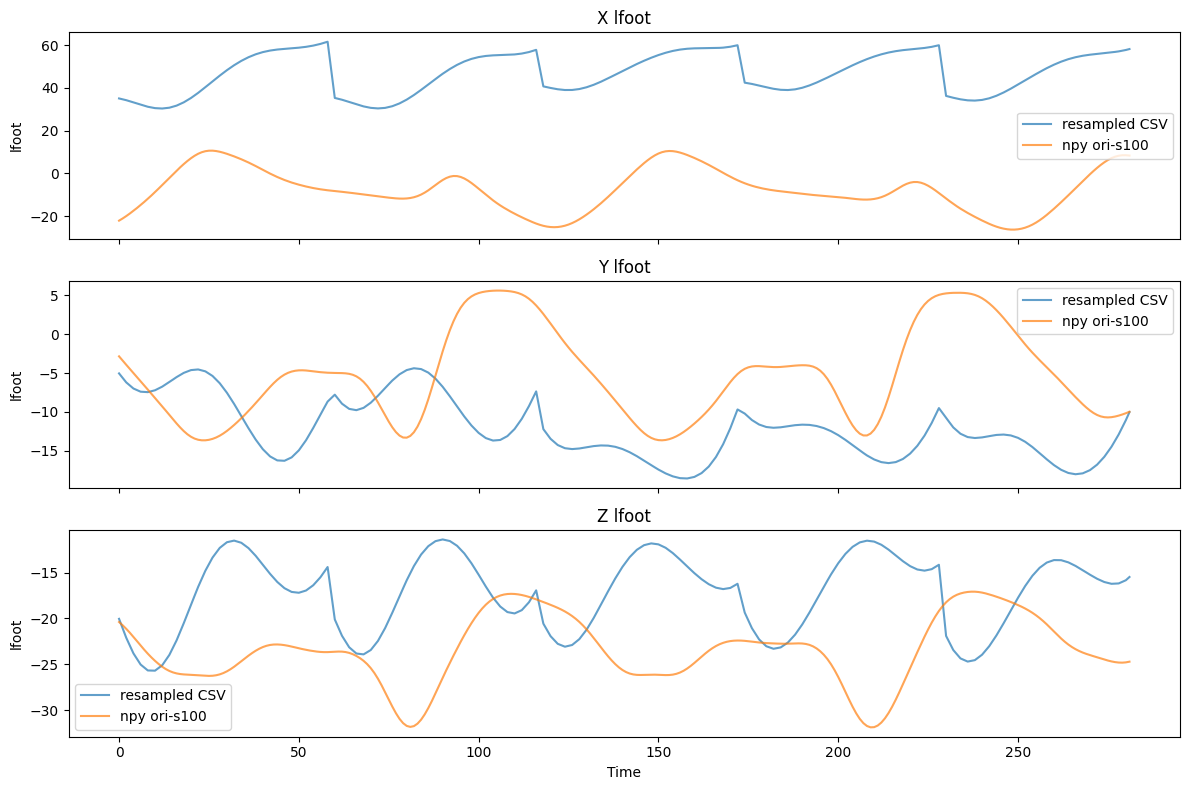

In [6]:
## === Load and Prepare Data ===
file_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Data/IMUExerciseClassification/parsed_joint_angles/SUB01/Run/resampled_Run.csv"
df_resampled = pd.read_csv(file_path)
#
# Extract LeftFoot Accelerometer Data (X, Y, Z)
#csv_lfoot_acc = df_resampled[['LeftAnkleAngle_ML_X', 'LeftAnkleAngle_ML_Y', 'LeftAnkleAngle_ML_Z']]
#time_csv = np.arange(len(csv_lfoot_acc))

external = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Running/SUB01/LeftAnkleAngle/angle.npy")
time_csv = np.arange(external.shape[0])
#
# Load .npy data
ori = np.load("/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/sample for plot from baseline paper/s100_processed_running_sample/lankle/angle.npy")
time_npy = np.arange(ori.shape[0])  # or provide actual time vector if available
#
# Plot together
#plot_sensor_waveform_comparison(csv_lfoot_acc, ori, time_csv, time_npy, 'LeftAnkleAngle_ML')
plot_sensor_waveform_comparison(external, ori, time_csv, time_npy, 'LeftAnkleAngle_ML')

## Generate npy

### Create folder

In [6]:
processed_data_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1"

In [10]:
patients = ['SUB01', 'SUB02', 'SUB03', 'SUB04', 'SUB05', 'SUB06', 'SUB07', 'SUB08', 'SUB09', 
            'SUB10', 'SUB11', 'SUB12', 'SUB13', 'SUB14','SUB15', 'SUB16', 'SUB17', 'SUB18', 'SUB19']
motions = ['Walk', 'Run']
# Define body parts to extract
body_parts = ["Pelvis", "LeftThigh", "RightThigh", "LeftShank", "RightShank", "LeftFoot", "RightFoot"]
angle_parts = ["LeftAnkleAngle", "RightAnkleAngle", "LeftHipAngle", "RightHipAngle", "LeftKneeAngle", "RightKneeAngle"]
for patient in patients:
    for motion in motions:
        for part in body_parts:
            os.makedirs(os.path.join(processed_data_path, patient, motion, part), exist_ok=True)

### Generate npy files

In [21]:
folder_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Data/IMUExerciseClassification/parsed_joint_angles"
processed_data_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1"

In [24]:
def generate_angle_npy(folder_path, processed_data_path):
    sub_dirs = sorted(glob.glob(f"{folder_path}/*/"))
    
    for sub_dir in sub_dirs:
        patient_number = os.path.basename(os.path.normpath(sub_dir))
        for category in ["Walk", "Run"]:
            category_path = os.path.join(sub_dir, category)
            file_paths = sorted(glob.glob(f"{category_path}/resampled*.csv"))
            
            if not file_paths:
                continue  # Skip if no matching file
            
            # Directly read CSV with headers
            df = pd.read_csv(file_paths[0])
            
            # Define body parts to extract
            angle_parts = [
                "LeftAnkleAngle", "RightAnkleAngle",
                "LeftHipAngle", "RightHipAngle",
                "LeftKneeAngle", "RightKneeAngle"
            ]
            
            for part in angle_parts:
                # Get columns like 'LeftAnkleAngle_ML_X', 'LeftAnkleAngle_ML_Y', 'LeftAnkleAngle_ML_Z'
                angle_columns = [f"{part}_ML_X", f"{part}_ML_Y", f"{part}_ML_Z"]
                
                if all(col in df.columns for col in angle_columns):
                    angles_data = df[angle_columns].to_numpy()
                    
                    save_path = os.path.join(processed_data_path, category, patient_number, part)
                    os.makedirs(save_path, exist_ok=True)
                    np.save(os.path.join(save_path, "angle.npy"), angles_data)
                    print(os.path.join(save_path, "angle.npy"))
                    
generate_angle_npy(folder_path, processed_data_path)

/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/LeftAnkleAngle/angle.npy
/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/RightAnkleAngle/angle.npy
/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/LeftHipAngle/angle.npy
/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/RightHipAngle/angle.npy
/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Run/SUB01/LeftAnkleAngle/angle.npy
/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preproce

In [11]:
folder_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Data/IMUExerciseClassification/parsed_h5_csv"
processed_data_path = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1"

In [13]:
def generate_imu_npy(folder_path, processed_data_path):
    sub_dirs = sorted(glob.glob(f"{folder_path}/*/"))
    
    for sub_dir in sub_dirs:
        patient_number = os.path.basename(os.path.normpath(sub_dir))
        for category in ["Walk", "Run"]:
            category_path = os.path.join(sub_dir, category)
            file_paths = sorted(glob.glob(f"{category_path}/resmapled*.csv"))
            
            if not file_paths:
                continue
        
            df = pd.read_csv(file_paths[0])  # Read with header

            # Define body parts to extract
            body_parts = ["Pelvis", "LeftThigh", "RightThigh", "LeftShank", "RightShank", "LeftFoot", "RightFoot"]

            for part in body_parts:
                acc_columns = [f"{part}_Accelerometer_X", f"{part}_Accelerometer_Y", f"{part}_Accelerometer_Z"]
                gyr_columns = [f"{part}_Gyroscope_X", f"{part}_Gyroscope_Y", f"{part}_Gyroscope_Z"]

                # Check if columns exist before extracting
                if all(col in df.columns for col in acc_columns):
                    acc_data = df[acc_columns].to_numpy()
                    save_path = os.path.join(processed_data_path, category,patient_number, part)
                    os.makedirs(save_path, exist_ok=True)
                    np.save(os.path.join(save_path, "acc.npy"), acc_data)
                    print("Saving to:", os.path.join(save_path, "acc.npy"))
                else: print("No")

                if all(col in df.columns for col in gyr_columns):
                    gyr_data = df[gyr_columns].to_numpy()
                    save_path = os.path.join(processed_data_path, category,patient_number, part)
                    os.makedirs(save_path, exist_ok=True)
                    np.save(os.path.join(save_path, "gyr.npy"), gyr_data)
                    print("Saving to:", os.path.join(save_path, "gyr.npy"))
                else: print("No")

generate_imu_npy(folder_path, processed_data_path)

Saving to: /Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/Pelvis/acc.npy
Saving to: /Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/Pelvis/gyr.npy
Saving to: /Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/LeftThigh/acc.npy
Saving to: /Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/LeftThigh/gyr.npy
Saving to: /Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/wearable-project/data preprocessing/Preprocessed_external_data_1/Walk/SUB01/RightThigh/acc.npy
Saving to: /Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/w

### Convert .npy into .h5

In [ ]:
import h5py

npy_directory = "/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/Milestone2/Preprocessed_data/"  # Change this to your npy folder
def convert_to_h5(folder_path):
# Define paths
    h5_filename = "Data.h5"
    # Create an HDF5 file
    with h5py.File(h5_filename, 'w') as h5f:
        for root, _, files in os.walk(folder_path):
            for file in files:
                if file.endswith(".npy"):
                    file_path = os.path.join(root, file)
                    print(file_path)
                    data = np.load(file_path, allow_pickle=True)  # Load .npy file

                    # Create a dataset name based on the file structure
                    dataset_name = os.path.relpath(file_path, folder_path).replace(os.sep, "/").replace(".npy", "")

                    # Store in HDF5
                    h5f.create_dataset(dataset_name, data=data)

                    print(f"Saved {file_path} as {dataset_name} in {h5_filename}")

    print(f"Conversion complete! Data saved in {h5_filename}")

/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/Milestone2/Preprocessed_data/Walk/SUB11/LeftShank/gyr.npy
Saved /Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/Milestone2/Preprocessed_data/Walk/SUB11/LeftShank/gyr.npy as Walk/SUB11/LeftShank/gyr in Data.h5
/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/Milestone2/Preprocessed_data/Walk/SUB11/LeftShank/acc.npy
Saved /Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/Milestone2/Preprocessed_data/Walk/SUB11/LeftShank/acc.npy as Walk/SUB11/LeftShank/acc in Data.h5
/Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/Milestone2/Preprocessed_data/Walk/SUB11/RightHipAngle/angle.npy
Saved /Users/ccy/Documents/CMU/Spring2025/42696 Wearable Health Technology/Projects/Milestone2/Preprocessed_data/Walk/SUB11/RightHipAngle/angle.npy as Walk/SUB11/RightHipAngle/angle in Data.h5
/Users/ccy/Documents/CMU/Spring